# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (18)

**15/01/2024**

## Aplicar un caso de uso (*Clasificación*)

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Dataset de cubierta forestal

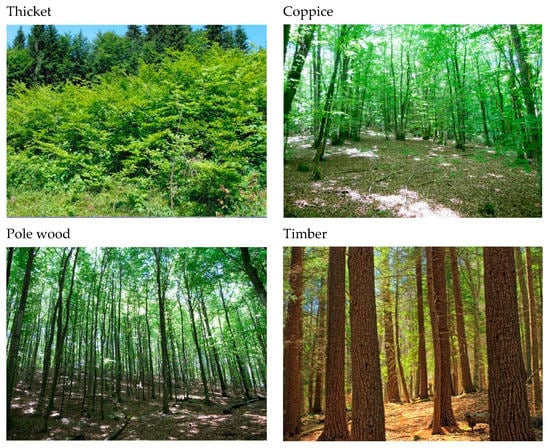

**[Forest Covertype data](https://archive.ics.uci.edu/ml/datasets/Covertype)** es un conjunto de datos cargado en la librería _sklearn_ que permite realizar un ejercicio tipo problemas de **clasificación**. El objetivo de este dataset es **estudiar las variables cartográficas** para poder **predecir el tipo de cubierta forestal**. El tipo real de cubierta forestal para una observación (celda de 30 x 30 metros) se ha determinado a partir de los datos del **Servicio Forestal de EE.UU. (USFS)**. 

Los datos están en forma **cruda** (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Estas áreas de estudio representan **bosques con mínimas perturbaciones causadas por el hombre**, por lo que los tipos de cubierta forestal existentes son más el **resultado de procesos ecológicos**, que de prácticas de gestión forestal.

### Análisis Exploratorio Inicial, Tratamiento y Limpieza de datos

In [3]:
from sklearn.datasets import fetch_covtype

# Construimos un dataframe con los datos medidos de la cubierta forestal
dataset_cub = pd.DataFrame(fetch_covtype()["data"], columns=fetch_covtype()["feature_names"])

# Añadimos la variable objetivo
dataset_cub['target'] = fetch_covtype()["target"]

dataset_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Vamos a sacar un dataset mucho más pequeño para **simplificar los cálculos** y **reducir el tiempo de computación** de los algoritmos. Una primera idea para extraer un subconjunto podría ser quedarnos por ejemplo con los **_100.000_ primeros registros** de la tabla.

In [4]:
dataset_cub[0:100000]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3100.0,52.0,16.0,376.0,50.0,3816.0,227.0,203.0,105.0,4295.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99996,3090.0,50.0,16.0,361.0,40.0,3840.0,225.0,202.0,106.0,4268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99997,3083.0,45.0,18.0,335.0,33.0,3864.0,222.0,198.0,104.0,4241.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99998,3077.0,41.0,15.0,309.0,43.0,3889.0,221.0,205.0,116.0,4214.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


El posible peligro de este enfoque es que **no obtengamos un subconjunto muy representativo**. Realizamos una consulta sobre una de las variables del datset para ver si estadísticamente tienen las mismas características o no. 

In [5]:
dataset_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

In [6]:
dataset_cub[0:100000]['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2862.036680
std         231.376584
Name: Elevation, dtype: float64

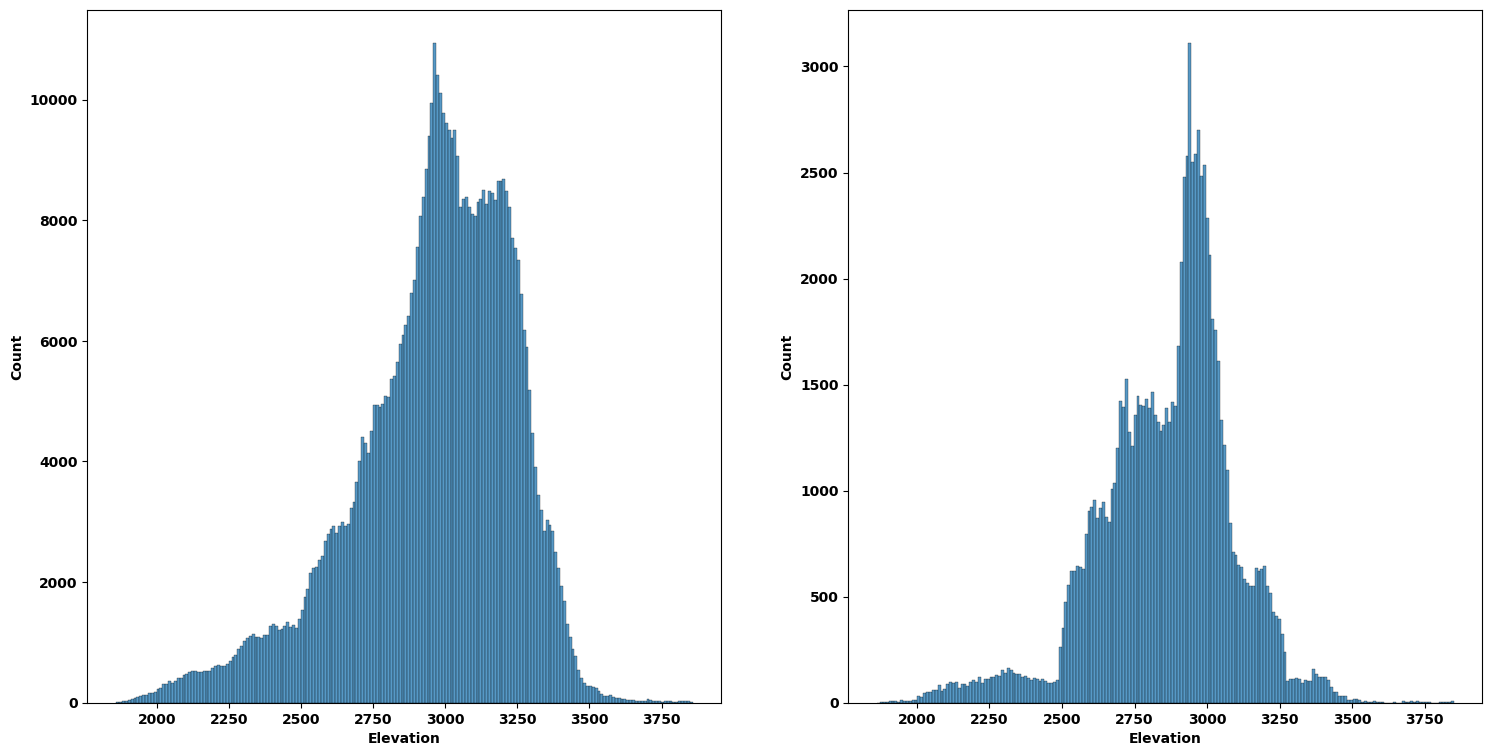

In [7]:
# Comparar la distribución de la variable "Elevation" entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(dataset_cub[0:100000]['Elevation'], bins=200, ax=axes[1])
plt.show()

Se puede observar que **la variable analizada no tiene la misma representación en el subconjunto** de los _100.000_ primeros registros del dataset. Otra opción para conseguir un trozo de los datos originales, sería aplicar la técnica de **remuestro aleatorio (_random resampling_)**.

Vamos a hacer un remuestreo aleatorio para **quedarnos aproximadamente con el 17% de los datos** usando el método **[sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)** sobre los _DataFrames_ de la librería _pandas_:

In [8]:
100000/len(dataset_cub)

0.17211348474730298

In [9]:
df_cub = dataset_cub.sample(frac=0.17211348474730298, random_state=222).reset_index(drop=True)
df_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [10]:
# Consultamos las principales estadísticas de la variable analizada anteriormente
display(dataset_cub['Elevation'].describe()[['count', 'mean', 'std']])
df_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

count    100000.000000
mean       2959.010060
std         279.864034
Name: Elevation, dtype: float64

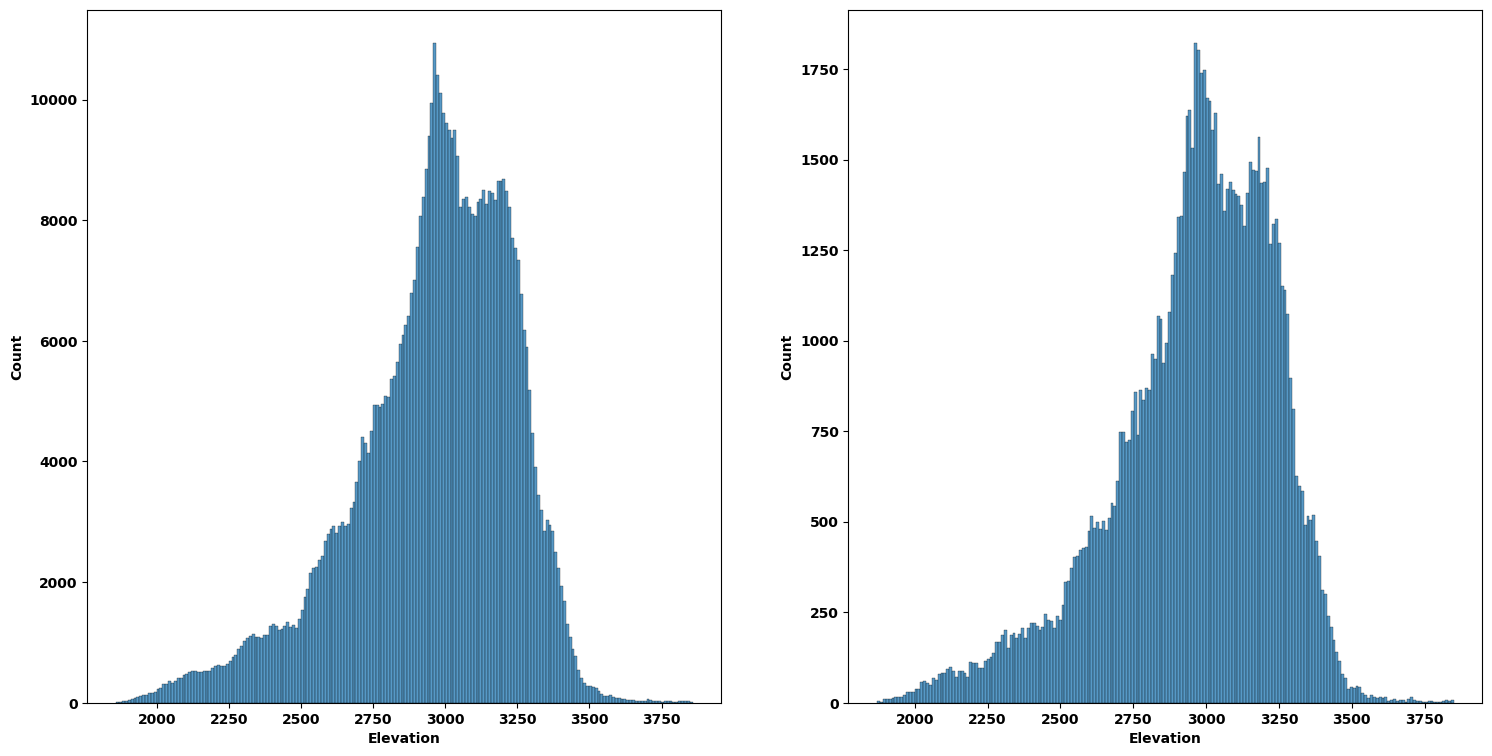

In [11]:
# Comparar la distribución de la variable "Elevation" entre el DataFrame original y el subconjunto obtenido mediante el remuestreo aleatorio
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(df_cub['Elevation'], bins=200, ax=axes[1])
plt.show()

Podemos ver que este último subconjunto, a pesar de tener solamente 17% de los datos, **sí que incluye un set de observaciones muy representativas** respecto al dataset original. 

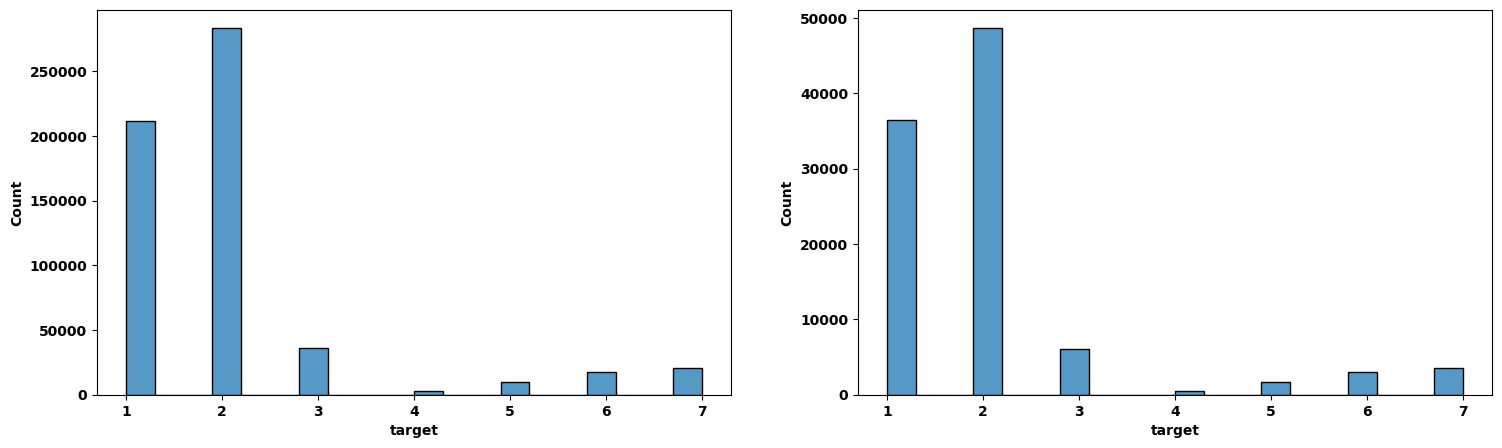

In [12]:
# Comparar la distribución de la variable objetivo entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(dataset_cub['target'], bins=20, ax=axes[0])
sns.histplot(df_cub['target'], bins=20, ax=axes[1])
plt.show()

In [13]:
df_cub.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,2959.010060,155.927130,14.078440,268.415310,45.890660,2356.444880,212.226180,223.392060,142.541110,1984.702670,...,0.091120,0.078660,0.003050,0.003510,0.000190,0.000510,0.026360,0.023650,0.014600,2.05919
std,279.864034,111.880189,7.466349,212.389266,57.923415,1559.881883,26.567206,19.768911,38.116316,1328.355754,...,0.287781,0.269209,0.055143,0.059141,0.013783,0.022578,0.160204,0.151957,0.119946,1.40864
min,1871.000000,0.000000,0.000000,0.000000,-164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2810.000000,59.000000,9.000000,108.000000,7.000000,1110.000000,198.000000,213.000000,119.000000,1022.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,2995.000000,127.000000,13.000000,218.000000,29.000000,2005.000000,218.000000,226.000000,143.000000,1712.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
75%,3163.000000,261.000000,18.000000,384.000000,68.000000,3336.000000,231.000000,237.000000,168.000000,2553.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
max,3849.000000,360.000000,66.000000,1390.000000,592.000000,7117.000000,254.000000,254.000000,253.000000,7168.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.00000


In [14]:
df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           100000 non-null  float64
 1   Aspect                              100000 non-null  float64
 2   Slope                               100000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    100000 non-null  float64
 4   Vertical_Distance_To_Hydrology      100000 non-null  float64
 5   Horizontal_Distance_To_Roadways     100000 non-null  float64
 6   Hillshade_9am                       100000 non-null  float64
 7   Hillshade_Noon                      100000 non-null  float64
 8   Hillshade_3pm                       100000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  100000 non-null  float64
 10  Wilderness_Area_0                   100000 non-null  float64
 11  Wilderness_Area_1          

In [15]:
# Conteo de valores perdidos/faltantes  
df_cub.isna().sum().sum()

0

In [16]:
# Consultamos los registros que tienen algún valor nulo
df_cub.drop(df_cub.dropna().index)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target


### Reducción de Variables (___Dimensionality Reduction___)

### **`Ejercicio 18.1`**

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de **Selección de variables basada en árbol de decisión** mediante las importancias de cada variable (**`Decision Trees Importances`**):

- Filtra el tablón para quedarnos solamente con **las variables que aglutinan hasta el `95%` de la información** que se requiere para estimar la variable objetivo.
- `random_state=100`

---

In [17]:
from sklearn.tree import DecisionTreeRegressor

#Lista de features y target.
target = 'target'
features = [x for x in df_cub.columns if x != target]

#crear arbol
arbol_redu = DecisionTreeRegressor(random_state=100)

#entrenar arbol
arbol_redu.fit(X=df_cub[features], y=df_cub[target])

#predict
y_pred_arbol =arbol_redu.predict(X=df_cub[features])


In [18]:
arbol_redu.feature_importances_

array([3.41345452e-01, 3.54339666e-02, 1.74179718e-02, 4.32717735e-02,
       4.49401782e-02, 1.12351218e-01, 3.05681405e-02, 3.06711189e-02,
       2.59192824e-02, 1.28327839e-01, 1.52291307e-02, 5.43878389e-03,
       4.36187566e-02, 1.63883283e-03, 6.29726531e-04, 2.08724943e-03,
       5.09018496e-04, 3.28042196e-03, 7.92138946e-04, 1.41188353e-03,
       0.00000000e+00, 4.71167398e-06, 3.49876096e-05, 3.72608460e-03,
       2.73205287e-03, 6.47768772e-05, 2.79836759e-03, 2.21201678e-04,
       0.00000000e+00, 3.63613181e-04, 1.55545448e-03, 2.33340853e-06,
       5.42648590e-04, 1.28826161e-03, 3.43729040e-04, 1.30836818e-03,
       3.28275977e-03, 3.46672804e-03, 0.00000000e+00, 2.81872267e-04,
       1.91306225e-04, 1.19692788e-05, 2.39263962e-03, 1.40103065e-03,
       3.09237838e-03, 3.56762583e-02, 4.36534112e-03, 7.55804681e-04,
       1.06176770e-02, 4.97338452e-06, 1.88304618e-03, 8.84300309e-03,
       1.88447496e-02, 5.01898719e-03])

In [19]:
#dataframe con datos importancia ordenados.
importancia = pd.DataFrame(data=arbol_redu.feature_importances_, index=features, columns=["Importancia"])
importancia.sort_values(by=importancia.columns[0], ascending=False, inplace=True)

#añadimos columna con la importancia acumulada
importancia["imp_acum"] = importancia["Importancia"].cumsum()

# Conjunto de variables más importantes
importancia.loc[importancia['imp_acum']<=0.95]

,Importancia,imp_acum
Elevation,0.341345,0.341345
Horizontal_Distance_To_Fire_Points,0.128328,0.469673
Horizontal_Distance_To_Roadways,0.112351,0.582025
Vertical_Distance_To_Hydrology,0.044940,0.626965
Wilderness_Area_2,0.043619,0.670583
Horizontal_Distance_To_Hydrology,0.043272,0.713855
Soil_Type_31,0.035676,0.749531
Aspect,0.035434,0.784965
Hillshade_Noon,0.030671,0.815637
Hillshade_9am,0.030568,0.846205


In [20]:
#lista de variables no tan importantes y creacion de nuevo DF con las columnas con 95% o mas de importancia
variables_del = importancia.loc[importancia['imp_acum']>0.95].index.to_list()

df_cub_filt = df_cub.drop(labels=variables_del, axis='columns')
df_cub_filt

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_31,Soil_Type_34,Soil_Type_37,Soil_Type_38,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2


### **`Ejercicio 18.2`**

Después de filtrar el dataset vamos a plantear un **problema de clasificación** para conseguir un **clasificador de la cubierta forestal** en basea a las **variables cartográficas**:  

**`18.2.1`** Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.  (metodo para tener la destribucion de las variables con el resto)

**`18.2.2`** Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de `0` a `1`.
- Convertir la variable objetivo en valores numéricos **entre 0 y el número de clases menos 1**.

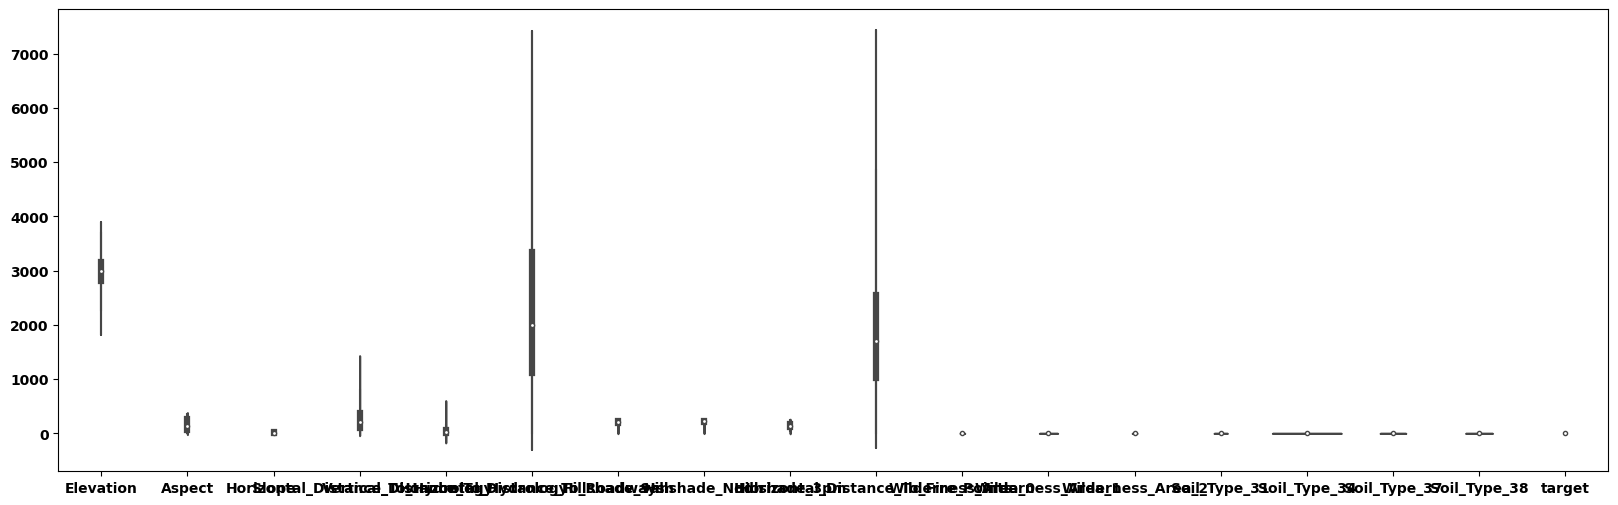

In [21]:
#SOLUCION 18.2.1
# grafica distribucion variables
plt.figure(figsize=(20,6))
sns.violinplot(data=df_cub_filt,orient="v")
plt.show()

Podemos ver que si que es necesario realizar la normalizacion de los datos ya que se encuentran bastante dispares.

In [22]:
#SOLUCION 18.2.2
#variables y target separado.

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

etiquetado = LabelEncoder().fit(df_cub_filt['target'])
etiquetado.classes_

array([1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [23]:
etiquetado.transform(df_cub_filt['target'])

array([6, 2, 2, ..., 1, 1, 0])

In [24]:
df_cub_filt['target_label'] = etiquetado.transform(df_cub_filt['target'])
df_cub_filt.groupby(['target','target_label']).count()[['Slope']]

,,Slope
target,target_label,
1,0,36457
2,1,48630
3,2,6064
4,3,521
5,4,1650
6,5,3070
7,6,3608


In [25]:
df_cub_filt2 = df_cub_filt.drop('target', axis='columns')
Y_normal = df_cub_filt2['target_label']
y_normal_df = pd.DataFrame(Y_normal)
Y_normal

0        6
1        2
2        2
3        1
4        1
        ..
99995    1
99996    5
99997    1
99998    1
99999    0
Name: target_label, Length: 100000, dtype: int64

In [26]:
X = df_cub_filt2.drop('target_label', axis='columns')

escalado = MinMaxScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal


array([[0.72800809, 0.00833333, 0.1969697 , ..., 0.        , 1.        ,
        0.        ],
       [0.28210313, 0.19444444, 0.43939394, ..., 0.        , 0.        ,
        0.        ],
       [0.22901921, 0.875     , 0.21212121, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46258847, 0.40833333, 0.10606061, ..., 0.        , 0.        ,
        0.        ],
       [0.50151668, 0.1       , 0.15151515, ..., 0.        , 0.        ,
        0.        ],
       [0.55561173, 0.175     , 0.34848485, ..., 0.        , 0.        ,
        0.        ]])

In [27]:
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
X_normal

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_31,Soil_Type_34,Soil_Type_37,Soil_Type_38
0,0.728008,0.008333,0.196970,0.396403,0.357143,0.390614,0.795276,0.846457,0.588933,0.309710,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.282103,0.194444,0.439394,0.068345,0.240741,0.223268,0.933071,0.665354,0.169960,0.054548,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.229019,0.875000,0.212121,0.089209,0.273810,0.054939,0.716535,0.897638,0.731225,0.078125,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.550051,0.961111,0.151515,0.064748,0.243386,0.825629,0.787402,0.877953,0.640316,0.555106,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.525278,0.172222,0.227273,0.237410,0.345238,0.456091,0.909449,0.818898,0.418972,0.317383,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.524267,0.163889,0.227273,0.455396,0.575397,0.145567,0.905512,0.818898,0.422925,0.080497,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99996,0.256825,0.811111,0.318182,0.068345,0.265873,0.185612,0.610236,0.905512,0.841897,0.046038,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.462588,0.408333,0.106061,0.030216,0.226190,0.303780,0.901575,0.940945,0.565217,0.219587,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.501517,0.100000,0.151515,0.369784,0.251323,0.385837,0.862205,0.854331,0.521739,0.495257,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:

df_normal = X_normal.copy()

df_normal['target'] = y_normal_df['target_label']
df_normal

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_31,Soil_Type_34,Soil_Type_37,Soil_Type_38,target
0,0.728008,0.008333,0.196970,0.396403,0.357143,0.390614,0.795276,0.846457,0.588933,0.309710,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6
1,0.282103,0.194444,0.439394,0.068345,0.240741,0.223268,0.933071,0.665354,0.169960,0.054548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
2,0.229019,0.875000,0.212121,0.089209,0.273810,0.054939,0.716535,0.897638,0.731225,0.078125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.550051,0.961111,0.151515,0.064748,0.243386,0.825629,0.787402,0.877953,0.640316,0.555106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.525278,0.172222,0.227273,0.237410,0.345238,0.456091,0.909449,0.818898,0.418972,0.317383,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.524267,0.163889,0.227273,0.455396,0.575397,0.145567,0.905512,0.818898,0.422925,0.080497,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
99996,0.256825,0.811111,0.318182,0.068345,0.265873,0.185612,0.610236,0.905512,0.841897,0.046038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
99997,0.462588,0.408333,0.106061,0.030216,0.226190,0.303780,0.901575,0.940945,0.565217,0.219587,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99998,0.501517,0.100000,0.151515,0.369784,0.251323,0.385837,0.862205,0.854331,0.521739,0.495257,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


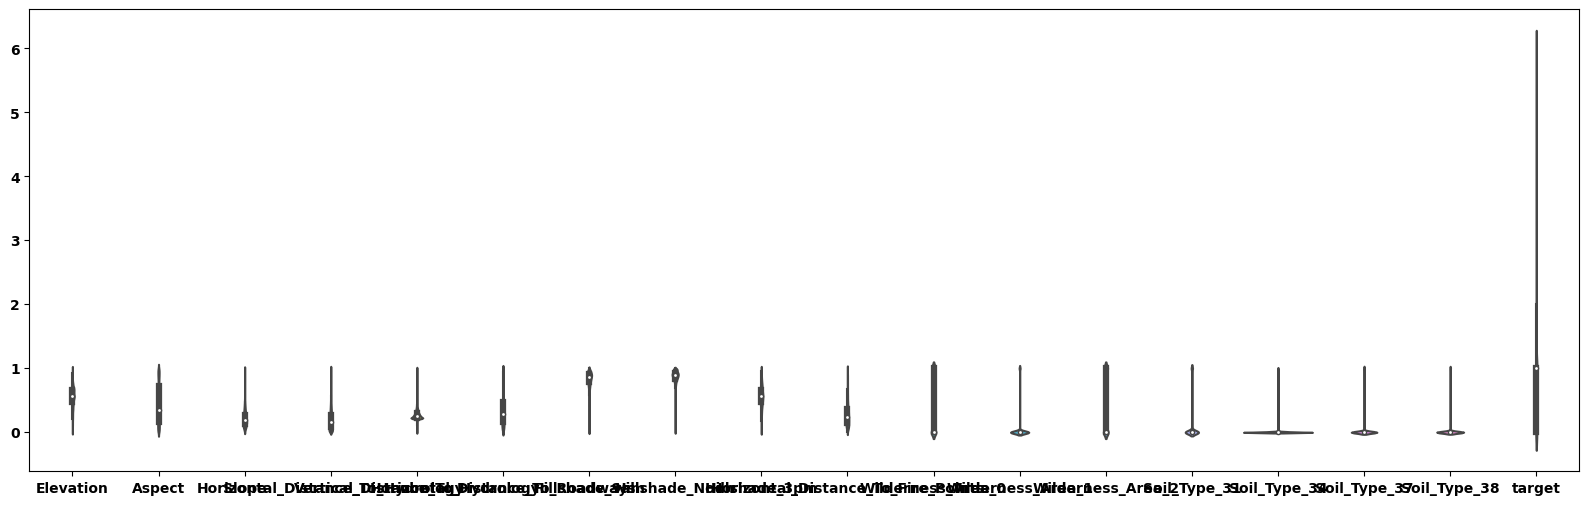

In [29]:
plt.figure(figsize=(20,6))
sns.violinplot(data=df_normal,orient="v")
plt.show()

---

### **`Ejercicio 18.3`**

Después de estandarizar los datos procedemos a crear el **primer clasificador**. Teniendo en cuenta las siguientes indicaciones, primero divide el datset en _training_ y en _test_ y posteriormente, entrena un modelo de **regresión logística**, calcula las siguientes métricas para evaluar este modelo y analiza su rendimiendo:
- `random_state=100`
- Guarda el `20%` de los datos para testeo.
- Calcula las proporciones de los dos conjuntos creados. 
- Número máximo de iteraciones igual a `1000`
- Métricas:
    - Accuracy
    - Confusion matrix
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, Y_normal, test_size=0.2, random_state=100)

In [31]:
# "test_size" representa la proporción del conjunto de datos a incluir en la división de Test
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

80000
20000


100000

In [32]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression(max_iter=1000,
                           random_state=100)

log_r.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=100)

In [33]:
y_pred_log_r = log_r.predict(X_test)

In [34]:
print(y_pred_log_r.shape)

(20000,)


In [35]:
unique, counts = np.unique(y_pred_log_r, return_counts=True)
dict(zip(unique, counts))

{0: 7205, 1: 10612, 2: 1458, 3: 9, 5: 257, 6: 459}

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_log_r)

print('Accuracy Score = ', accuracy)

Accuracy Score =  0.70355


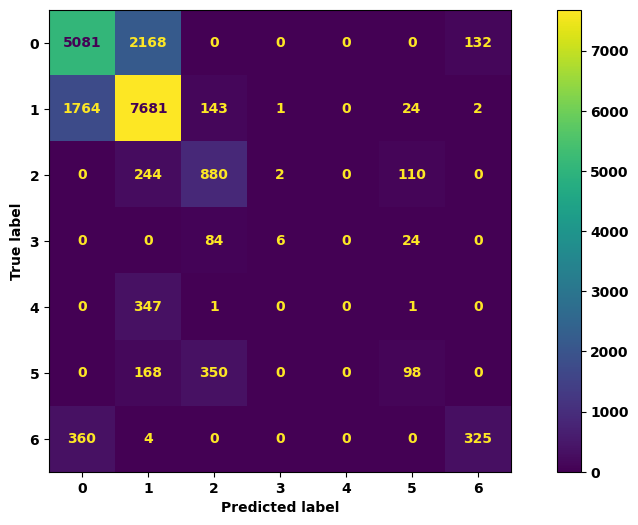

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_log_r),
                               display_labels=log_r.classes_)
disp.plot()

plt.show()

In [38]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_log_r, average='weighted')
print('F1-score average=\'weighted\': ', f1)

F1-score average='weighted':  0.6895863535653518


In [39]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred_log_r, zero_division=0)
print('Classification Report: \n', class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      7381
           1       0.72      0.80      0.76      9615
           2       0.60      0.71      0.65      1236
           3       0.67      0.05      0.10       114
           4       0.00      0.00      0.00       349
           5       0.38      0.16      0.22       616
           6       0.71      0.47      0.57       689

    accuracy                           0.70     20000
   macro avg       0.54      0.41      0.43     20000
weighted avg       0.69      0.70      0.69     20000



Podemos ver que aunque el modelo tenga un rendimiento razonable con un 70.35% de precisión, hay zonas de mejora, como en la identificación de clases minoritarias y en la gestión del equilibrio de clases.

---

### **`Ejercicio 18.4`**

Ahora probamos la creación de otros modelos basados en **Gradient Boosting**:  

**`18.4.1`** Entrena un modelo tipo ***XGBoost Classifire*** y calcula las métricas correspondientes para analizar su rendimiento en comparación con el primer modelo creado anteriormente. Consulta también, el **número** y la **profundidad máxima** de los árboles del bosque creado en este paso:
- `random_state=100`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.4.2`** Saca las curvas de complejidad del modelo _XGBClassifier_ (**Model Complexity Curves**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros _"óptimos"_ y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con **funciones de _numpy_** para considerar estos números de árboles: `[100, 200, 300, 400, 500]`  
- define con funciones de _numpy_ este rango de profundidades máximas:  de `6` a `20` __inclusive__ en pasos de 2 en 2.
- valores a considerar para el *`learning_rate`*: `[0.01, 0.1, 0.3, 0.5]`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.4.3`** Saca la gráfica del *Learning Curve* para estos dos modelos, definiendo y aplicando una función que tome el valor de los hiperparámetros analizados como su entrada y que dibuje la evolución del rendimiento del modelo para el conjunto de _training_ y de _test_. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [40]:
# SOLUCION 18.4.1
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=100)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [41]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print('Accuracy Score = ', accuracy_xgb)

Accuracy Score =  0.84645


In [42]:
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
print('F1-score average=\'weighted\': ', f1_xgb)

F1-score average='weighted':  0.8452923897848441


In [43]:
class_report_xgb = classification_report(y_test, y_pred_log_r, zero_division=0)
print('Classification Report: \n', class_report_xgb)

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      7381
           1       0.72      0.80      0.76      9615
           2       0.60      0.71      0.65      1236
           3       0.67      0.05      0.10       114
           4       0.00      0.00      0.00       349
           5       0.38      0.16      0.22       616
           6       0.71      0.47      0.57       689

    accuracy                           0.70     20000
   macro avg       0.54      0.41      0.43     20000
weighted avg       0.69      0.70      0.69     20000



In [44]:
'''It's a bit crooked, but what I'm currently doing is dump-ing the model (XGBoost produces a list where each element is a string representation of a single tree), and then counting how many elements are in the list:'''
dump_list = xgb_model.get_booster().get_dump()
num_trees = len(dump_list)
print('Num. de árboles: ',num_trees)

Num. de árboles:  700


In [45]:
xgb_model.max_depth

Podemos ver que las metricas son bastante mejores que las del modelo anterior por lo tanto este modelo sería preferible al anterior aunque aun se podría mejorar

In [60]:
# SOLUCION 18.4.2
'''**`18.4.2`** Saca las curvas de complejidad del modelo _XGBClassifier_ (**Model Complexity Curves**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros _"óptimos"_ y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con **funciones de _numpy_** para considerar estos números de árboles: `[100, 200, 300, 400, 500]`  
- define con funciones de _numpy_ este rango de profundidades máximas:  de `6` a `20` __inclusive__ en pasos de 2 en 2.
- valores a considerar para el *`learning_rate`*: `[0.01, 0.1, 0.3, 0.5]`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`'''

n_estimators = np.arange(100,501,100)
max_depth = np.arange(6,21,2)
learning_rate_list = [0.01,0.1,0.3,0.5]
learning_rate = np.array(learning_rate_list)

El mejor valor de n_estimators podría ser = 500  que consigue un Accuracy = 0.89625


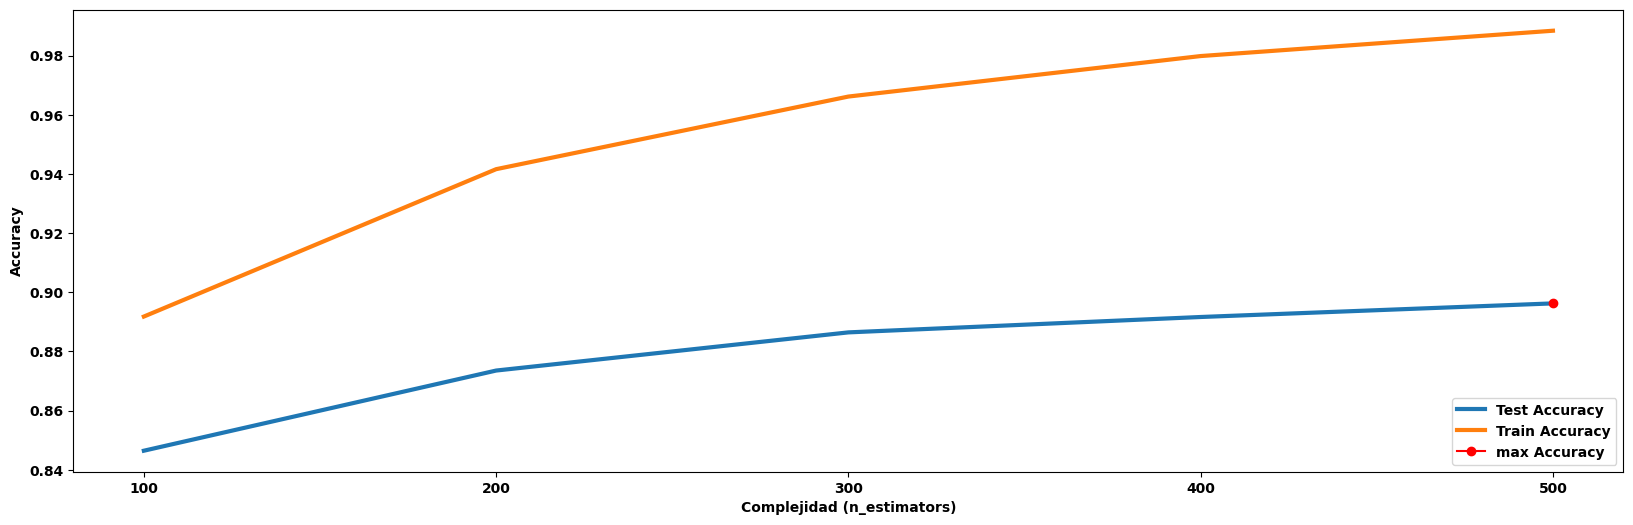

In [55]:
train_score_esti = np.zeros(n_estimators.size)
test_score_esti = np.zeros(n_estimators.size)

for i in range(n_estimators.size):
    mod_esti = XGBClassifier(n_estimators=n_estimators[i], random_state=100)
    mod_esti.fit(X_train, y_train)
    train_score_esti[i] = accuracy_score(y_train, mod_esti.predict(X_train))
    test_score_esti[i] = accuracy_score(y_test, mod_esti.predict(X_test))

print("El mejor valor de n_estimators podría ser =", n_estimators[np.argmax(
    test_score_esti)], " que consigue un Accuracy =", max(test_score_esti))

# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20, 6))
plt.plot(n_estimators, test_score_esti, linewidth=3, label='Test Accuracy')
plt.plot(n_estimators, train_score_esti, linewidth=3, label='Train Accuracy')
plt.plot(n_estimators[np.argmax(test_score_esti)], max(test_score_esti),
         marker='o', color="red", label="max Accuracy")
plt.xticks(n_estimators)
plt.xlabel('Complejidad (n_estimators)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

El mejor valor de max_depth podría ser = 18  que consigue un Accuracy = 0.9253


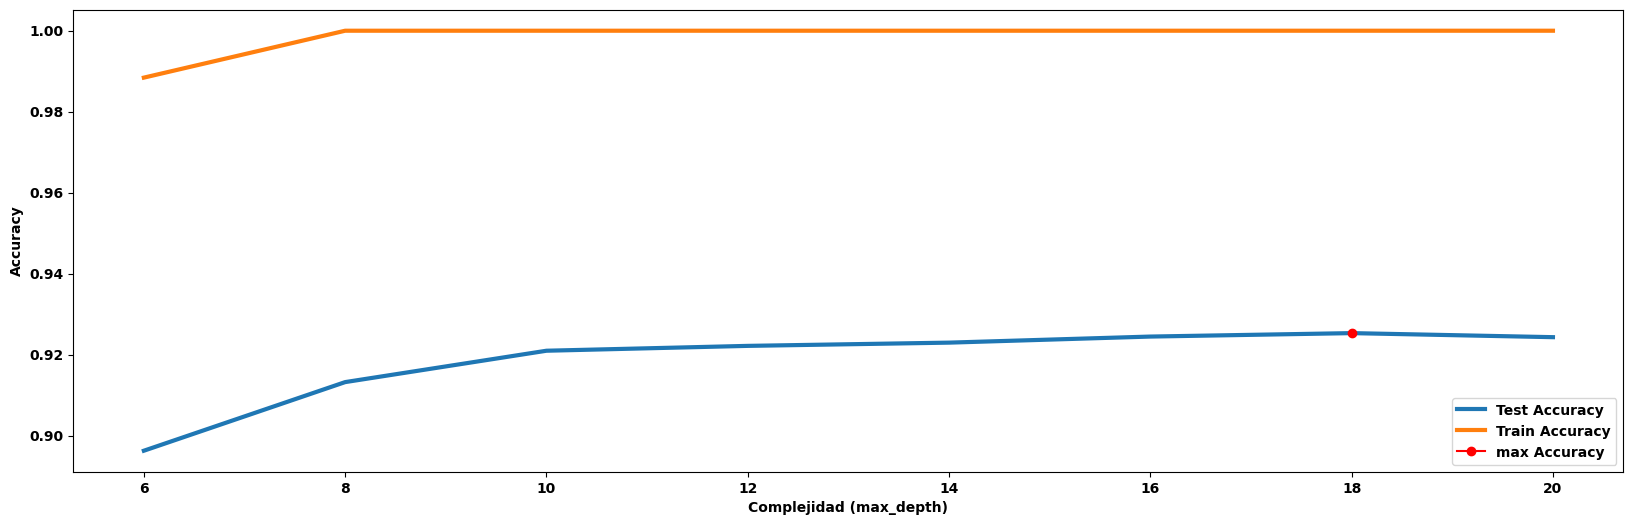

In [56]:
train_score_depth = np.zeros(max_depth.size)
test_score_depth = np.zeros(max_depth.size)

for i in range(max_depth.size):
    mod_depth = XGBClassifier(max_depth=max_depth[i],n_estimators=500, random_state=100)
    mod_depth.fit(X_train, y_train)
    train_score_depth[i] = accuracy_score(y_train, mod_depth.predict(X_train))
    test_score_depth[i] = accuracy_score(y_test, mod_depth.predict(X_test))

print("El mejor valor de max_depth podría ser =", max_depth[np.argmax(
    test_score_depth)], " que consigue un Accuracy =", max(test_score_depth))

# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20, 6))
plt.plot(max_depth, test_score_depth, linewidth=3, label='Test Accuracy')
plt.plot(max_depth, train_score_depth, linewidth=3, label='Train Accuracy')
plt.plot(max_depth[np.argmax(test_score_depth)], max(test_score_depth),
         marker='o', color="red", label="max Accuracy")
plt.xticks(max_depth)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

El mejor valor de learning_rate podría ser = 0.3  que consigue un Accuracy = 0.9253


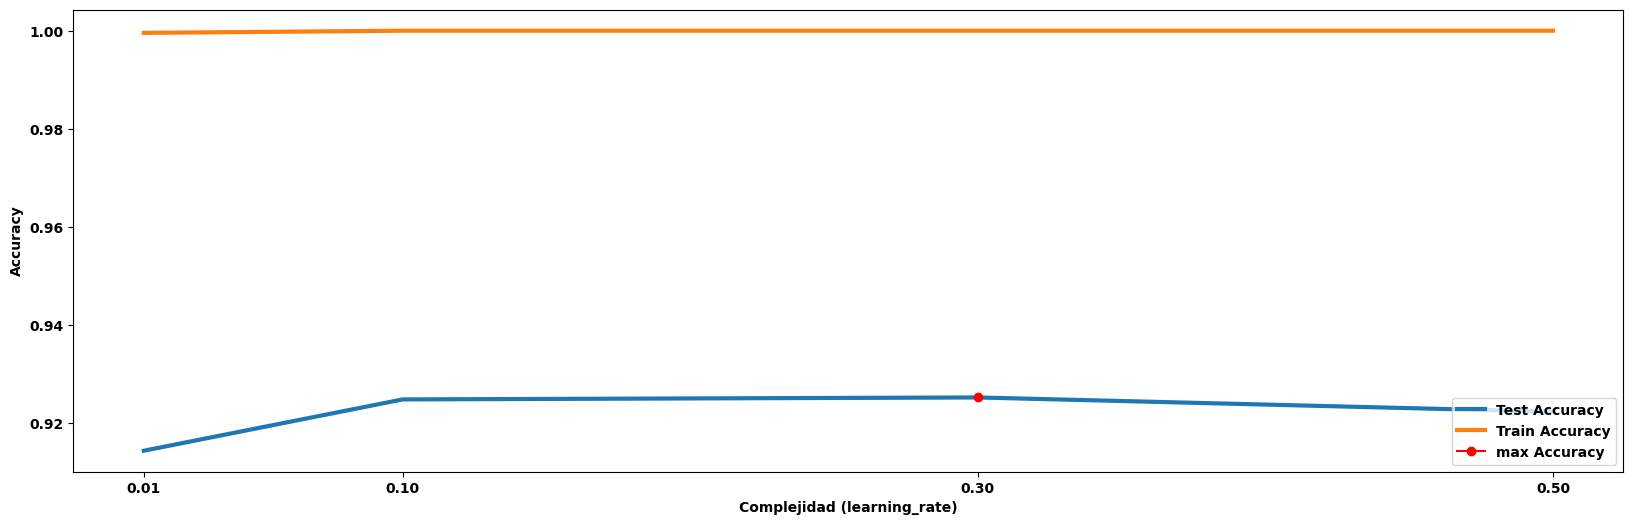

In [61]:
train_score_learning = np.zeros(learning_rate.size)
test_score_learning = np.zeros(learning_rate.size)

for i in range(learning_rate.size):
    mod_learning = XGBClassifier(max_depth=18,n_estimators=500, random_state=100, learning_rate=learning_rate[i])
    mod_learning.fit(X_train, y_train)
    train_score_learning[i] = accuracy_score(y_train, mod_learning.predict(X_train))
    test_score_learning[i] = accuracy_score(y_test, mod_learning.predict(X_test))

print("El mejor valor de learning_rate podría ser =", learning_rate[np.argmax(
    test_score_learning)], " que consigue un Accuracy =", max(test_score_learning))

# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20, 6))
plt.plot(learning_rate, test_score_learning, linewidth=3, label='Test Accuracy')
plt.plot(learning_rate, train_score_learning, linewidth=3, label='Train Accuracy')
plt.plot(learning_rate[np.argmax(test_score_learning)], max(test_score_learning),
         marker='o', color="red", label="max Accuracy")
plt.xticks(learning_rate)
plt.xlabel('Complejidad (learning_rate)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [63]:
best_xgb = XGBClassifier(random_state=100,
                         max_depth=18,
                         n_estimators=500,
                         learning_rate=0.3)
best_xgb.fit(X_train, y_train)

pred_best_xgb = best_xgb.predict(X_test)

accuracy_best_xgb = accuracy_score(y_test, pred_best_xgb)
f1_best_xgb = f1_score(y_test, pred_best_xgb, average='weighted')
class_rep_best_xgb = classification_report(y_test, pred_best_xgb, zero_division=0)

print("Accuracy:", accuracy_best_xgb)
print("F1-score (weighted):", f1_best_xgb)
print("Classification Report:\n", class_rep_best_xgb)

Accuracy: 0.9253
F1-score (weighted): 0.9249326498856001
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7381
           1       0.92      0.95      0.94      9615
           2       0.90      0.90      0.90      1236
           3       0.84      0.81      0.82       114
           4       0.85      0.69      0.76       349
           5       0.85      0.83      0.84       616
           6       0.95      0.93      0.94       689

    accuracy                           0.93     20000
   macro avg       0.89      0.86      0.88     20000
weighted avg       0.93      0.93      0.92     20000



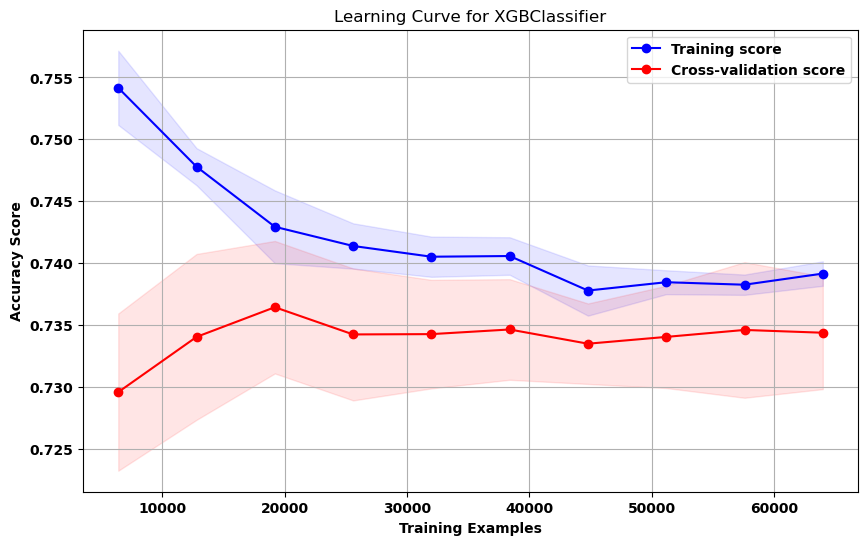

In [68]:
'''**`18.4.3`** Saca la gráfica del *Learning Curve* para estos dos modelos, definiendo y aplicando una función que tome el valor de los hiperparámetros analizados como su entrada y que dibuje la evolución del rendimiento del modelo para el conjunto de _training_ y de _test_. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)'''
from sklearn.model_selection import learning_curve

def plot_learning_curve(random_state: int=100,
                          max_depth: int=3,
                          n_estimators: int=100,
                          learning_rate: float=0.1):
    # Crea un modelo XGBClassifier con los parámetros dados
    xgb_classifier = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        random_state=random_state
    )

    # Utiliza learning_curve para obtener las puntuaciones de entrenamiento y prueba en diferentes tamaños de conjunto de datos
    train_sizes, train_scores, test_scores = learning_curve(
        xgb_classifier, X_train, y_train, cv=5, scoring='accuracy', 
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # Calcula las medias y desviaciones estándar de las puntuaciones
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Grafica la curva de aprendizaje
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='red', marker='o')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='red')
    plt.title('Learning Curve for XGBClassifier')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


plot_learning_curve()


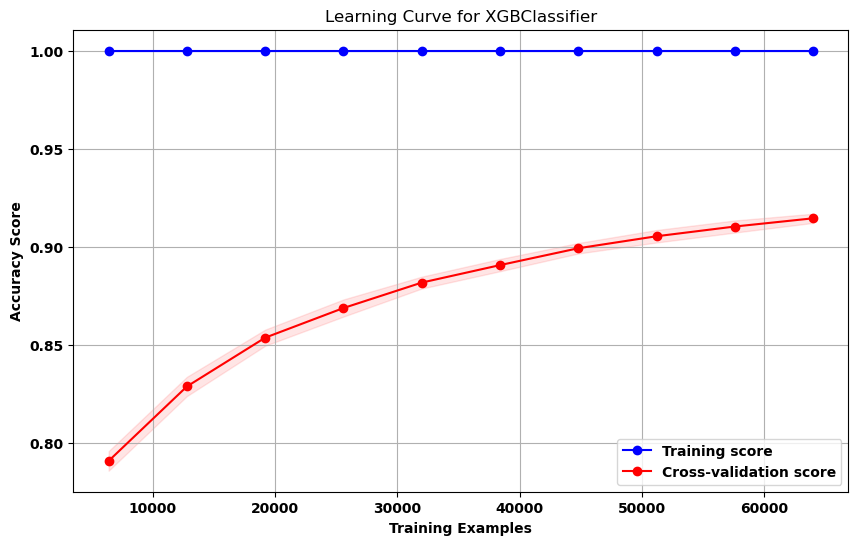

In [67]:
plot_learning_curve(max_depth=18,
                         n_estimators=500,
                         learning_rate=0.3)

Claramente podemos ver que el modelo con los mejores parametros es el que mejores metricas obtiene sin ninguna duda, por lo tanto sería el modelo favorito.

---

### **`Ejercicio 18.5`**

Ahora probamos la creación de otros modelo basados en **Redes Neuronales Artificiales**:  

**`18.5.1`** Entrena un modelo tipo ***Multi-layer Perceptron classifier*** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.5.2`** Entrena otro modelo del mismo tipo indicando los siguientes hiperparámetros y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- `hidden_layer_sizes=(100,200,100)`
- Número máximo de iteraciones igual a `10000`
- `alpha=1e-5`
- `tol=1e-5`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.5.3`** Construye con la misma estructura del modelo definido en el paso anterior, una red neuronal profunda (_**DNN**-Deep Neural Networks_) usando la librería _keras_  realizando las preparaciones y tratamientos necesarias al respecto y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.5.4`** Crea otra red neuronal profunda usando _keras_ y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores y explica cuál sería **el mejor modelo que elegirías** para este problema de clasificación multi-clase:
- Definir las capas ocultas: 
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **1000** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
      
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`
- Explica si este modelo o algún otro modelo de todos los puntos realizados en este ejercicio, tiene **el mejor remdimiento en general** para ser elegido como **el clasificador de la cubierta forestal**.

In [69]:
'''**`18.5.1`** Entrena un modelo tipo ***Multi-layer Perceptron classifier*** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`'''
from sklearn.neural_network import MLPClassifier

clas_mlp = MLPClassifier(random_state=100)

clas_mlp.fit(X_train, y_train)
y_pred_mlp = clas_mlp.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
class_mlp = classification_report(y_test, y_pred_mlp, zero_division=0)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

print('Accuracy: ', accuracy_mlp)
print('Classification report: \n', class_mlp)
print('F1-score: ', f1_mlp)


Accuracy:  0.7598
Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.83      0.77      7381
           1       0.81      0.74      0.77      9615
           2       0.74      0.82      0.78      1236
           3       0.80      0.61      0.70       114
           4       0.61      0.20      0.30       349
           5       0.61      0.44      0.52       616
           6       0.84      0.77      0.80       689

    accuracy                           0.76     20000
   macro avg       0.73      0.63      0.66     20000
weighted avg       0.76      0.76      0.76     20000

F1-score:  0.7560638103814095


/Users/pablo/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [72]:
'''**`18.5.2`** Entrena otro modelo del mismo tipo indicando los siguientes hiperparámetros y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- `hidden_layer_sizes=(100,200,100)`
- Número máximo de iteraciones igual a `10000`
- `alpha=1e-5`
- `tol=1e-5`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`'''
clas_mlp_esp = MLPClassifier(random_state=100,
                             hidden_layer_sizes=(100,200,100),
                             max_iter=10000,
                             alpha=1e-5,
                             tol=1e-5)

clas_mlp_esp.fit(X_train, y_train)
y_pred_mlp_esp = clas_mlp_esp.predict(X_test)

accuracy_mlp_esp = accuracy_score(y_test, y_pred_mlp_esp)
class_mlp_esp = classification_report(y_test, y_pred_mlp_esp, zero_division=0)
f1_mlp_esp = f1_score(y_test, y_pred_mlp_esp, average='weighted')

print('Accuracy: ', accuracy_mlp_esp)
print('Classification report: \n', class_mlp_esp)
print('F1-score: ', f1_mlp_esp)

Accuracy:  0.89125
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      7381
           1       0.92      0.89      0.90      9615
           2       0.87      0.90      0.88      1236
           3       0.82      0.76      0.79       114
           4       0.67      0.83      0.74       349
           5       0.86      0.79      0.82       616
           6       0.96      0.84      0.90       689

    accuracy                           0.89     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.89      0.89      0.89     20000

F1-score:  0.8915821637409428


In [82]:
'''**`18.5.3`** Construye con la misma estructura del modelo definido en el paso anterior, una red neuronal profunda (_**DNN**-Deep Neural Networks_) usando la librería _keras_  realizando las preparaciones y tratamientos necesarias al respecto y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`'''
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Conv2D, Flatten
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from keras.backend import clear_session

clear_session()

semilla = 883
random.seed(semilla)
np.random.seed(semilla)
tf.random.set_seed(semilla)

modelo_dnn = Sequential()

modelo_dnn.add(Input(shape=X_train.shape[1]))
modelo_dnn.add(Dense(100, activation='relu'))
modelo_dnn.add(Dense(200, activation='relu'))
modelo_dnn.add(Dense(100, activation='relu'))
modelo_dnn.add(Dense(1, activation='sigmoid'))

modelo_dnn.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

modelo_dnn.summary()

registros = modelo_dnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)

y_pred_dnn = modelo_dnn.predict(X_test)

y_pred_dnn_filt = np.where(y_pred_dnn < 0.5, 0, 1)

print('Accuracy:', accuracy_score(y_test, y_pred_dnn_filt))
print(f1_score(y_test, y_pred_dnn_filt, average='weighted'))
print(classification_report(y_test, y_pred_dnn_filt, zero_division=0))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1800      
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 42201 (164.85 KB)
Trainable params: 42201 (164.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
800/800 [==============================] - 1s 1ms/step - loss: -142489.0625 - accuracy: 0.4856 - val_loss: -700675.3750 - val_accuracy: 0.4

En comparación con modelos anteriores sus métricas no son para nada buenas.

In [84]:
'''**`18.5.4`** Crea otra red neuronal profunda usando _keras_ y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores y explica cuál sería **el mejor modelo que elegirías** para este problema de clasificación multi-clase:
- Definir las capas ocultas: 
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **1000** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
      
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`
- Explica si este modelo o algún otro modelo de todos los puntos realizados en este ejercicio, tiene **el mejor remdimiento en general** para ser elegido como **el clasificador de la cubierta forestal**.'''

clear_session()

semilla = 883
random.seed(semilla)
np.random.seed(semilla)
tf.random.set_seed(semilla)

modelo_dnn_esp = Sequential()

modelo_dnn_esp.add(Input(shape=X_train.shape[1]))
modelo_dnn_esp.add(Dense(50, activation='relu'))
modelo_dnn_esp.add(Dense(100, activation='relu'))
modelo_dnn_esp.add(Dense(200, activation='relu'))
modelo_dnn_esp.add(Dense(1000, activation='relu'))
modelo_dnn_esp.add(Dense(200, activation='relu'))
modelo_dnn_esp.add(Dense(100, activation='relu'))
modelo_dnn_esp.add(Dense(50, activation='relu'))

modelo_dnn_esp.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

modelo_dnn_esp.summary()

registros_esp = modelo_dnn_esp.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)

y_pred_dnn_esp = modelo_dnn_esp.predict(X_test)

y_pred_dnn_filt_esp = np.where(y_pred_dnn_esp < 0.5, 0, 1)

y_pred_labels_esp = np.argmax(y_pred_dnn_filt_esp, axis=1)

accuracy_esp = accuracy_score(np.argmax(y_test, axis=1), y_pred_labels_esp)
f1_esp = f1_score(np.argmax(y_test, axis=1), y_pred_labels_esp, average='weighted')
classification_rep_esp = classification_report(np.argmax(y_test, axis=1), y_pred_labels_esp, zero_division=0)

print('Accuracy:', accuracy_esp)
print('F1-score (weighted):', f1_esp)
print('Classification Report:')
print(classification_rep_esp)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                900       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 200)               20200     
                                                                 
 dense_3 (Dense)             (None, 1000)              201000    
                                                                 
 dense_4 (Dense)             (None, 200)               200200    
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 50)                5

ValueError: `axis` must be fewer than the number of dimensions (1)

Viendo las métricas de accuracy que va dejando, se puede ver que son modelos que no pueden ni si quiera competir con los modelos anteriores, ya que tienen unos resultados horribles.